In [1]:
# Imporitng all necessary module
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


np.random.seed(1000)
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'


In [2]:
#Configuring the directory path of all the images
DATA_DIR = 'data'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [3]:
# From directorey we are finding out the category name and create a variable to use in resizing the image
IMG_SIZE = 227
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['without_mask', 'with_mask']


In [4]:
# Looking how many level we have
labels=[i for i in range(len(CATEGORIES))]

In [5]:
labels

[0, 1]

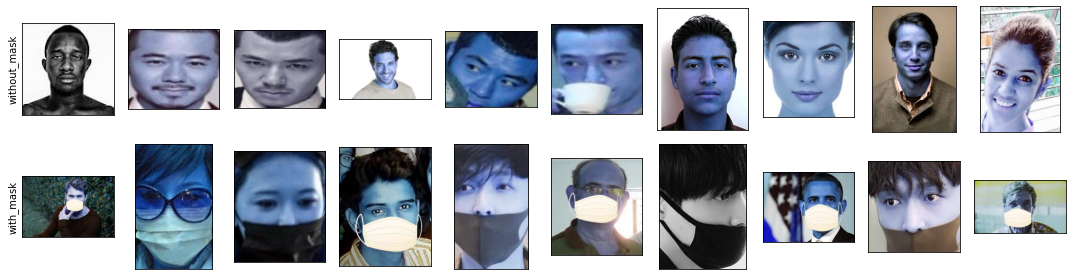

In [6]:
# We are displaying 10 photos from without_mask and 10 photos from with_mask total 20 images
plt.figure(figsize=(15,4))
i=0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR,c)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.subplot(2,10,i+1)
        plt.imshow(img_array)
        if i%10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i%10 == 0:
            break

plt.tight_layout()        
plt.show() 

In [7]:
# We are converting train images into array and resizing them and append them into training_data
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) # 'E:/DATASETS/classification/Face Mask Dataset/train/WithMask'
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0], [], [], [], ...., []]
        except WException as e:
            pass
        
print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 2004/2004 [00:03<00:00, 544.66it/s]

4008


In [8]:
# We are converting validate images into array and resizing them and append them into valid_data
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(valid_data))

100%|███████████████████████████████████████████████████████████████████████████████| 672/672 [00:00<00:00, 711.22it/s]

1344


In [9]:
# We are converting test images into array and resizing them and append them into test_data
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except WException as e:
            pass
        
print(len(test_data))

100%|████████████████████████████████████████████████████████████████████████████████| 725/725 [00:07<00:00, 99.74it/s]

1457


In [10]:
# shuffling all those list
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [11]:
# Reshaping the training images then append them in X_train and associated label in Y_train
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,227,227,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (4008, 227, 227, 3) Y_train= (4008,)


In [12]:
# Reshaping the valid images then append them in X_valid and associated label in Y_valid

X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,227,227,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (1344, 227, 227, 3) Y_valid= (1344,)


In [13]:
# Reshaping the test images then append them in X_test and associated label in Y_test

X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (1457, 227, 227, 3) Y_test= (1457,)


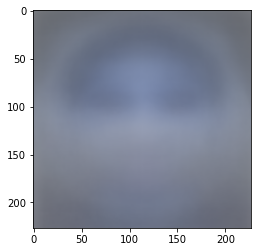

In [15]:
# Getting a mean image from all those train images
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [16]:
# converting those images norm image by subtracting to mean_image
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

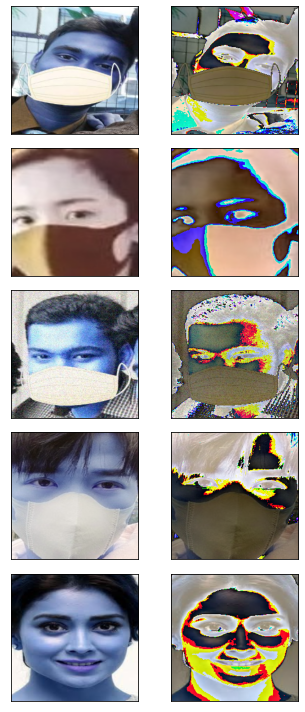

In [17]:
# Showing train and train_norm photos side by side
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [18]:
# creating our Alexnet architecture which has 7 layer
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
    
    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(2),
    layers.Activation('softmax')

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 17, 17, 256)       0

In [19]:
# Compiling the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
# train the model by giving input as X_train_norm , output as Y_train and epoch 20.
h = model.fit(x=X_train_norm, y=Y_train, epochs=20, validation_data=(X_valid_norm, Y_valid), batch_size=32)

Epoch 1/20
126/126 [==============================] - 293s 2s/step - loss: 0.3487 - accuracy: 0.8847 - val_loss: 0.5489 - val_accuracy: 0.8080
Epoch 2/20
126/126 [==============================] - 284s 2s/step - loss: 0.2732 - accuracy: 0.9232 - val_loss: 1.7894 - val_accuracy: 0.6518
Epoch 3/20
126/126 [==============================] - 284s 2s/step - loss: 0.2471 - accuracy: 0.9279 - val_loss: 0.7424 - val_accuracy: 0.7939
Epoch 4/20
126/126 [==============================] - 297s 2s/step - loss: 0.1772 - accuracy: 0.9469 - val_loss: 0.5602 - val_accuracy: 0.8274
Epoch 5/20
126/126 [==============================] - 302s 2s/step - loss: 0.1552 - accuracy: 0.9533 - val_loss: 0.4987 - val_accuracy: 0.8586
Epoch 6/20
126/126 [==============================] - 305s 2s/step - loss: 0.1371 - accuracy: 0.9541 - val_loss: 0.6327 - val_accuracy: 0.8244
Epoch 7/20
126/126 [==============================] - 299s 2s/step - loss: 0.1125 - accuracy: 0.9658 - val_loss: 0.5045 - val_accuracy: 0.8304

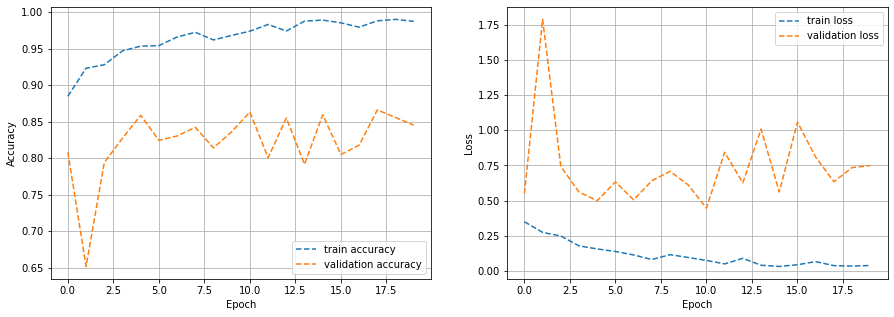

In [21]:
# plotting a figure comparing with accuray vs val_accuracy And loss vs val_loss
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [22]:
# evaluating the model and displaying the test accuracy and loss
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

46/46 [==============================] - 21s 431ms/step - loss: 1.1467 - accuracy: 0.7735

Test Accuracy: 0.7735071778297424

Test Loss: 1.1466505527496338


In [23]:
# Predicting the model by giving X_test as input
model.predict(X_test)

46/46 [==============================] - 22s 462ms/step


array([[1.0000000e+00, 5.2411152e-11],
       [1.0000000e+00, 1.6030496e-09],
       [1.4506401e-06, 9.9999857e-01],
       ...,
       [9.9998856e-01, 1.1397797e-05],
       [9.9943572e-01, 5.6427502e-04],
       [2.0012369e-03, 9.9799877e-01]], dtype=float32)

In [ ]:
# Saving the model
model.save("mask_detector2.model", save_format="h5")

In [5]:
# importing module for web cam mask or unmask detection
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from os.path import dirname, join
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

In [6]:
def detect_and_predict_mask(frame, faceNet, maskNet):
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(frame, 1.0, (227, 227),
                                 (104.0, 177.0, 123.0))

    faceNet.setInput(blob)
    detections = faceNet.forward()
    print(detections.shape)

    faces = []
    locs = []
    preds = []

    # loop over the detections
    for i in range(0, detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")

            (startX, startY) = (max(0, startX), max(0, startY))
            (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

            # convert it from BGR to RGB channel and ordering, resize
            face = frame[startY:endY, startX:endX]
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            face = cv2.resize(face, (227, 227))
            face = img_to_array(face)
            face = preprocess_input(face)

            # bounding boxes to their respective lists
            faces.append(face)
            locs.append((startX, startY, endX, endY))

    # only make a predictions if at least one face was detected
    if len(faces) > 0:
        faces = np.array(faces, dtype="float32")
        preds = maskNet.predict(faces, batch_size=32)
    return (locs, preds)

In [7]:

# load our serialized face detector model from disk
prototxtPath = r"deploy.protext"
weightsPath = r"res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
maskNet = load_model("mask_detector2.model")

# initialize the video stream
vs = VideoStream(src=0).start()

# loop over the frames from the video stream
while True:
    frame = vs.read()
    frame = imutils.resize(frame, width=400)

    (locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

    for (box, pred) in zip(locs, preds):
        # unpack the bounding box and predictions
        (startX, startY, endX, endY) = box
        (mask, withoutMask) = pred

        # draw bounding box and text
        label = "Mask" if (max(mask, withoutMask) * 100) < 76 else "No Mask"
        print(label)
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # include the probability in the label
        label = "{}".format(label)

        # display the label and bounding box rectangle on the output
        cv2.putText(frame, label, (startX, startY - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 5)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()


(1, 1, 200, 7)
1/1 [==============================] - 1s 651ms/step
No Mask
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
1/1 [==============================] - 0s 39ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 47ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 42ms/step
No Mask
(1, 1, 20

1/1 [==============================] - 0s 40ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 38ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 41ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 41ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 51ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 46ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 42ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 46ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 46ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 47ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 46ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 52ms/st

1/1 [==============================] - 0s 38ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 46ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 47ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 42ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 40ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 48ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 47ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 42ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 43ms/step
No Mask
(1, 1, 200, 7)
1/1 [====================

1/1 [==============================] - 0s 40ms/step
No Mask
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
1/1 [==============================] - 0s 39ms/step
No Mask
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
1/1 [==============================] - 0s 58ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 50ms/step
No Mask
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
1/1 [==============================] - 0s 43ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 38ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 41ms/step
No Mask
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
1/1 [==============================] - 0

Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 48ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 40ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 51ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 39ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 39ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 51ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 46ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 56ms/step
No Mask
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1

1/1 [==============================] - 0s 39ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 42ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 40ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 43ms/step
Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 47ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 45ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 44ms/step
No Mask
(1, 1, 200, 7)
1/1 [==============================] - 0s 41ms/step
No Mask
(1, 1, 200, 7)
1/1 [=============================